<a href="https://colab.research.google.com/github/saul1310/AI_Movie_Recommendation/blob/main/LLM_Movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data = Dataset.load_builtin('ml-100k')

In [ ]:
# Get the raw ratings
raw_ratings = data.raw_ratings

#how does just saying this print it out?
# Display the first few ratings
raw_ratings[:5]

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596')]

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
# Create an SVD model
model = SVD()

# Train the model
model.fit(trainset)

In [ ]:
predictions = model.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

RMSE: 0.9373
RMSE: 0.9373384152330393


In [ ]:
# Define a function to get movie recommendations for a user
def get_recommendations(user_id, num_recommendations=10):
    # Get a list of all movie IDs
    movie_ids = set(iid for (_, iid, _, _) in raw_ratings)

    # Predict ratings for all movies
    predictions = [model.predict(user_id, iid) for iid in movie_ids]

    # Sort predictions by estimated rating
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)

    return recommendations[:num_recommendations]

# Get recommendations for user 196
recommendations = get_recommendations(196)

# Print the recommendations
for r in recommendations:
    print(f'Movie ID: {r.iid}, Estimated Rating: {r.est}')


Movie ID: 408, Estimated Rating: 4.576143223929939
Movie ID: 318, Estimated Rating: 4.520754579881962
Movie ID: 169, Estimated Rating: 4.5009492652738015
Movie ID: 64, Estimated Rating: 4.498026688385403
Movie ID: 483, Estimated Rating: 4.486938217295881
Movie ID: 178, Estimated Rating: 4.47075652309265
Movie ID: 603, Estimated Rating: 4.44847512312347
Movie ID: 12, Estimated Rating: 4.439588254961921
Movie ID: 513, Estimated Rating: 4.434712741996867
Movie ID: 480, Estimated Rating: 4.417223499170006


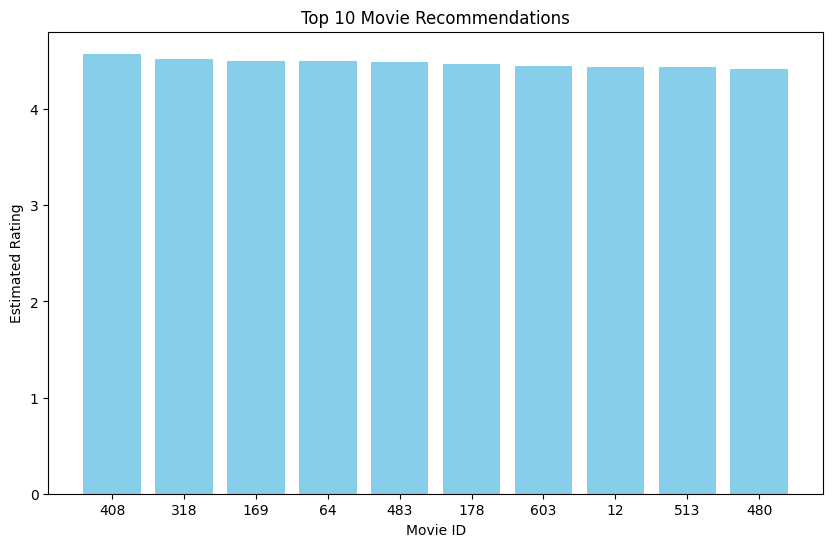

In [ ]:
# Get movie IDs and estimated ratings
movie_ids = [r.iid for r in recommendations]
estimated_ratings = [r.est for r in recommendations]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(movie_ids, estimated_ratings, color='skyblue')
plt.xlabel('Movie ID')
plt.ylabel('Estimated Rating')
plt.title('Top 10 Movie Recommendations')
plt.show()


In [ ]:
import pickle

# Save the model
with open('svd_model.pkl', 'wb') as file:
    pickle.dump(model, file)
